1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [65]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

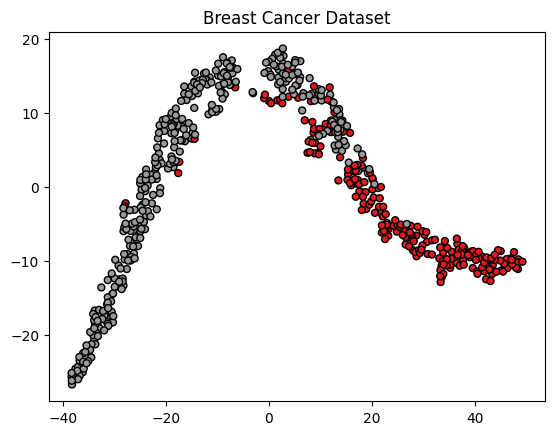

In [66]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#prform TSNE on the creasr cancer dataset. reduce dataset to 2D.
my_data_tsne_fit = TSNE(n_components=2).fit_transform(my_data.data)

#fit the data to the graph
plt.scatter(my_data_tsne_fit[:, 0], my_data_tsne_fit[:, 1], c=my_data.target, cmap = 'Set1', s=25,edgecolors='k')
plt.title("Breast Cancer Dataset") #title
plt.show() #show the graph

# type(my_data)
# print(my_data.DESCR)

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [67]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(...)

X = my_data.data # the features
y = my_data.target #tardet labels, 0 = malignant, 1 = bening
#split the data to a train and test sets. random_state = 30 to get the same split in every run.
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25, random_state = 30)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {Y_train.shape}")
print(f"Shape of y_test: {Y_test.shape}")

Shape of X_train: (426, 30)
Shape of X_test: (143, 30)
Shape of y_train: (426,)
Shape of y_test: (143,)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [68]:
from sklearn.tree import DecisionTreeClassifier

# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)

#Initialize the DecisionTreeClassifier
#I got the best results here for random_state=30, but it's random and whithout the seed, the results changes every run.
model_decision_tree = DecisionTreeClassifier(splitter="random" , random_state=30)
#train the decision tree
model_decision_tree.fit(X_train,Y_train)

# see optinize options

DecisionTreeClassifier(random_state=30, splitter='random')

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [69]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)

#Initialize the RandomForestClassifier
model_random_forest = RandomForestClassifier(random_state=30)
#train the random forest
model_random_forest.fit(X_train,Y_train)


RandomForestClassifier(random_state=30)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [70]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)

#Initialize the AdaBoostClassifier
model_adaboost = AdaBoostClassifier(learning_rate= 0.9, random_state=30)

#train the AdaBoost
model_adaboost.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.9, random_state=30)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [71]:
from os import name
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#
# dictionary of models:
modelsEnum = {
    "Decision Tree": model_decision_tree,
    "Random Forest": model_random_forest,
    "AdaBoost": model_adaboost
}

bestModel = None #the name of the best model
bestScore = 0 #the best score by 'F-Score'
# here goes the loop, that evaluate the models
for modelName, model in modelsEnum.items():
  print(f"\033[4m{modelName}\033[0m") #model name
  y_pred = model.predict(X_test)
  print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(Y_test, y_pred)}")
  print(f"Precision: {precision_score(Y_test, y_pred)}")
  print(f"Recall: {recall_score(Y_test, y_pred)}")
  print(f"F-Score: {f1_score(Y_test, y_pred)}\n")

  #the winner
  if f1_score(Y_test, y_pred) > bestScore:
    bestScore = f1_score(Y_test, y_pred)
    bestModel = modelName

print(f"Best model: {bestModel}\nscore: {bestScore}")
    #

Decision Tree
Accuracy: 0.958041958041958
Confusion Matrix: 
[[49  3]
 [ 3 88]]
Precision: 0.967032967032967
Recall: 0.967032967032967
F-Score: 0.967032967032967

Random Forest
Accuracy: 0.958041958041958
Confusion Matrix: 
[[47  5]
 [ 1 90]]
Precision: 0.9473684210526315
Recall: 0.989010989010989
F-Score: 0.967741935483871

AdaBoost
Accuracy: 0.965034965034965
Confusion Matrix: 
[[48  4]
 [ 1 90]]
Precision: 0.9574468085106383
Recall: 0.989010989010989
F-Score: 0.972972972972973

Best model: AdaBoost
score: 0.972972972972973
